In [1]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


TorchVision에서 Fashion-MNIST 데이터셋을 불러온다
- root는 학습/ 테스트 데이터가 저장되는 경로이다.
- train은 학습용 또는 테스트용 데이터셋 여부를 지정한다.
- download=True는 root에 데이터가 없는 경우 인터넷에서 다운로드한다.
- transform과 target_transform은 특징과 정답 변형을 지정한다.

In [2]:
#이 부분은 Fashion_MNIST 데이터셋을 로드하고 데이터를 준비하는 단계를 나타낸다.

import torch       #Pytorch 라이브러리를 임포트한다.
import torch.nn as nn   #Pytorch 신경망 모듈을 임포트한다. 
import torchvision.models as models #torchvision의 모델 모듈을 임포트해서 사전 훈련된 모델을 제공해준다.

import torchvision  
import torchvision.transforms as transforms #torchvision의 변환 모듈을 임포트해서 데이터 전처리 및 증강을 위해 사용
import numpy as np  #Numpy는 다차원 배열과 행렬 연산을 위한 라이브러리이다.
import matplotlib.pyplot as plt #Matplotlib은 데이터 시각화를 위한 라이브러리이다.

default_device = 'cuda' if torch.cuda.is_available() else 'cpu'     #사용 가능한 경우 GPU(CUDA)를 기본 디바이스로 설정하고 그렇지 않으면 CPU를 기본 디바이스로 설정
batch_size=128  #데이터 로더에서 사용할 미니 배치 크기를 정의한다.

#Fashion_MNIST 데이터셋을 불러와서 학습 데이터와 테스트 데이터로 나누고, 데이터를 처리하기 위한 데이터 로더를 생성
#데이터셋의 이미지는 28X28 크기의 흑백 이미지이며, 훈련 데이터와 테스트 데이터 모두 Torch 텐서로 변환한다. 
#데이터 로더는 지정된 배치 크기로 데이터를 미니배치 단위로 제공

train_data = torchvision.datasets.FashionMNIST(
    root = 'data', 
    train = True, 
    transform = transforms.ToTensor(), 
    download = True
)

test_data = torchvision.datasets.FashionMNIST(
    root = 'data',
    train = False,
    transform = transforms.ToTensor(),
    download= True
)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

MNIST 데이터셋은 손글씨 숫자(0,1,2 등)의 이미지로 이루어져 있다. 
Fashion MNIST는 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤한다.

각 이미지는 하나의 레이블에 매핑되어있는데 데이터셋에 클래스 이름이 들어 있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

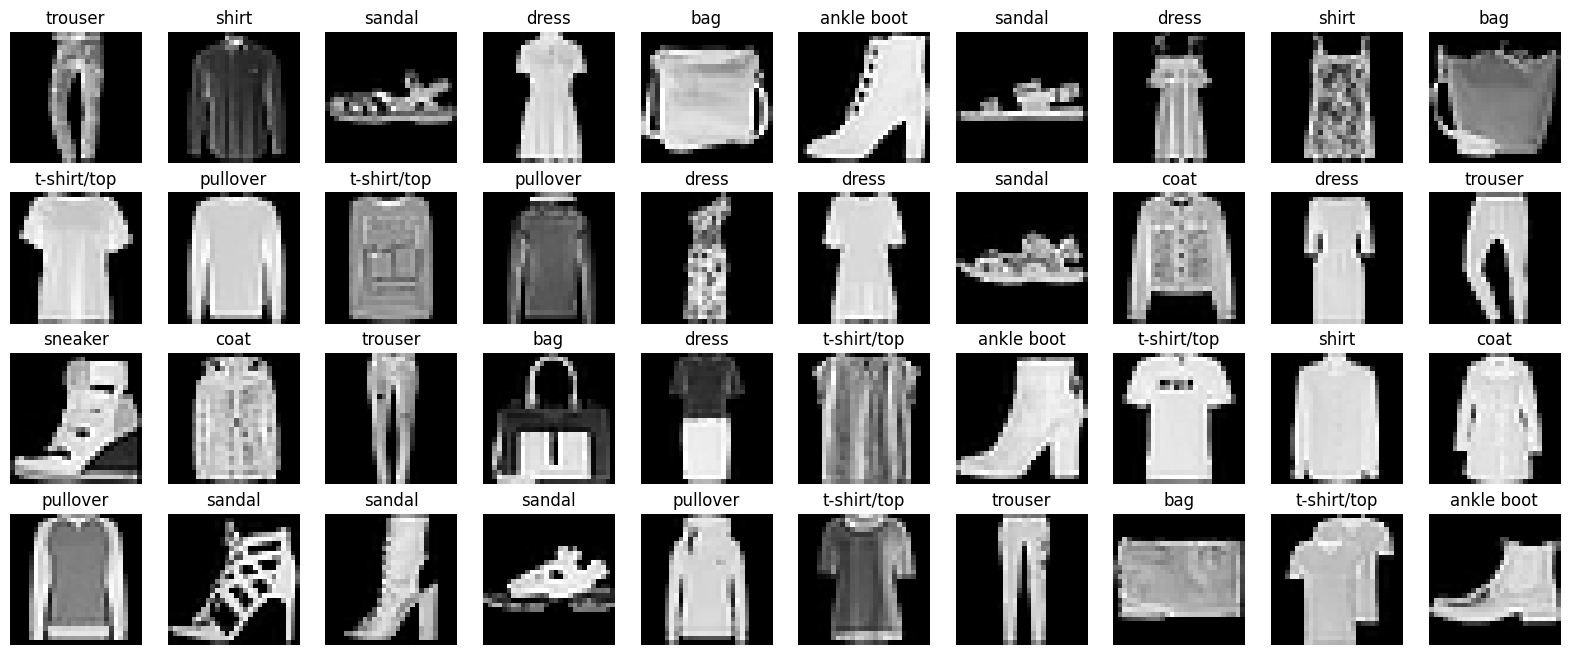

In [4]:
#이 코드는 학습 데이터의 미니배치를 가져와서 이미지와 해당 이미지의 레이블을 흑백 이미지로 시각화하는 것이다. 
# 각 이미지의 클래스 레이블을 확인하고 데이터가 적절하게 전처리 되었는지를 확인하는 데 사용된다.

#데이터 전처리 및 변환을 수행하기 위한 파이프 라인을 정의한다.
transform = transforms.Compose([
    #이미지를 Pytorch텐서로 변환한다. 여기서 이미지를 0에서 1 사이의 값으로 정규화하고, 
    #이미지의 채널을 첫 번째 차원으로 이동시켜서 (채널, 높이, 너비) 형태의 텐서로 변환한다
    transforms.ToTensor(),      
    transforms.Normalize((0.5,), (0.5,)) #이미지를 정규화하여 입력 이미지의 각 채널에서 평균 0.5를 빼고, 표준편차 0.5로 나누어준다.
    #이를 통해 이미지의 픽셀 값이 -1에서 1사이의 범위로 정규화된다.
])

#학습 데이터를 미니배치로 로드하는 데이터 로더를 생성한다. Train_data는 Fashion-MNIST의 학습 데이터셋이다
#shuffle = True로 설정하여 각 epochs마다 데이터를 섞는다.
data_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle = True)

#클래스 레이블을 숫자에서 텍스트로 매핑하는 딕셔너리를 정의한다. Fashion_MNIST의 클래스 레이블은 0부터 9까지의 정수로 표현되며
#이를 텍스트로 변환하여 이해하기 쉽게 만든다.
labels_map = {
    0: "t-shirt/top",
    1: "trouser",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "shirt",
    7: "sneaker",
    8: "bag",
    9: "ankle boot",
}

for images, labels in data_loader:  #데이터 로더를 통해 미니배치를 반복적으로 로드하고 순회한다.
    fig, axes = plt.subplots(4,10,figsize =(20,8))  #4*10 크기의 서브 플롯 그리드를 생성한다. 각 서브 플롯은 이미지와 해당 이미지의 레이블을 표시한다.
    for i, ax in enumerate(axes.flat) : #서브플롯을 평평하게 펼쳐서 각각의 플롯에 대해 반복한다.
        ax.imshow(images[i].squeeze(), cmap = 'gray')  #현재 이미지를 흑백으로 표시한다. images[i]는 현재 이미지 텐서이며, .squeeze() 함수를 사용하여 차원이 1인 축을 제거한다.
        ax.set_title(labels_map[labels[i].item()])  #현재 플롯의 제목을 해당 이미지의 클래스 레이블로 설정한다. labels_map 딕셔너리를 사용하여 숫자 레이블을 텍스트로 변환한다. 
        ax.axis('off')  #현재 플롯의 축을 비활성화한다. 이미지에 대한 x,y축 눈금과 레이블을 표시하지 않는다. 
    plt.show()  #모든 서브플롯을 화면에 표시한다.
    break   #첫 번째 미니배치만 시각화하고 반복문을 종료한다. 이는 코드를 실행할 때 너무 많은 이미지가 출력되는 것을 방지하기 위한 것



위의 코드에서는 Fashion-MNIST 데이터셋의 학습 데이터를 로드하고각 이미지를 흑백 이미지로 시각화하는 것이다.
데이터 전처리 및 변환을 수행하기 위한 파이프라인을 정의하고, 데이터를 미니배치로 로드하여 시각화한다.

클래스 레이블을 숫자에서 텍스트로 매핑하여 시각화 할때 어떻게 분류되어있는지 볼 수 있다.
위에서 plt.subplots(4,10,figsize = (20,8))에서 4행 10열로 총 40개의 데이터를 보여주고 흑백으로 보여줄 수 있게 코드를 작성하여 결과에서 그렇게 나타난것이다.

In [5]:
#이 코드는 간단한 CNN 모델을 정의하고 해당 모델의 구조를 요약하여 출력하는 것

import torch.nn as nn # 파이토치의 신경망 모듈(nn)을 임포트 - 다양한 신경망 레이어 및 함수를 제공한다.
%pip install torchsummary # 신경망 모델의 요약 정보를 제공하는 torchsummary 라이브러리를 설치
from torchsummary import summary # 설치된 torchsummary에서 summary 함수를 임포트 - 모델의 구조를 요약하여 출력한다.

class SimpleCNN(nn.Module): #nn.Module을 상속하여 Pytorch의 신경망 모델로 만들어진다. 
    def __init__(self): #클래스의 초기화 메서드를 정의한다.
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)  # 컨볼루션 레이어를 정의 : 입력 채널 수는 1(흑백이미지), 출력 채널 수는 16이며,커널 크기는 3*3이다 스트라이드는 1이고, 패딩은 1로 설정
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)        # 맥스 풀링 레이어를 정의 : 2*2 크기의 풀링 영역에서 최대 값을 추출한다. 스트라이드는 2이며, 패딩은 0으로 설정된다.
        self.fc = nn.Linear(16 * 14 * 14, 10)                               # 완전 연결 레이어를 정의 : 입력 크기는 이전 컨볼루션 레이어와 맥스 풀링 레이어를 거쳐서 얻은 피처 맵의 크기에 해당. 출력 크기는 클래스 수에 해당하는 10이다.

    def forward(self, x):       #순전파 메서드를 정의한다.
        x = self.pool(nn.functional.relu(self.conv1(x)))                    # 컨볼루션 -> ReLU -> 맥스 풀링
        x = x.view(-1, 16 * 14 * 14)                                        # 플래튼(3차원 피처 맵을 1차원 벡터로 변환한다.)
        x = self.fc(x)                                                      # 완전 연결 레이어를 통과시켜 최종 출력을 계산한다.
        return nn.functional.log_softmax(x, dim=1)                          #모델의 출력을 로그 소프트맥스 함수를 통과시켜 반환한다. 이는 다중 클래스 분류 문제에서 확률값을 얻기 위해 사용
    
model = SimpleCNN() #모델 객체를 생성한다.
summary(model,input_size=(1,28,28))    #summary 함수를 사용하여 모델의 구조를 요약한다. input_size로는 (채널 수, 높이, 너비)를 입력한다. 여기서는 28*28 크기의 흑백이미지를 입력으로 사용한다.

Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Linear-3                   [-1, 10]          31,370
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 0.12
Estimated Total Size (MB): 0.24
----------------------------------------------------------------


입력으로 28*28 크기의 흑백이미지를 받아서 첫 번째 컨볼루션 레이어는 16개의 필터를 사용하여 입력 이미지를 처리하고, 출력은 16개의 채널을 가진 28*28 크기의 feature map이다

맥스 풀링 레이어는 커널 크기가 2*2이고, 스트라이드가 2인 맥스 풀링을 수행하여 feature map의 크기를 절반으로 줄인다. 출력은 16개의 채ㅓㄹ을 가지 14*14크기의 feature map이다

완전 연결 레이어는 16*14*14의 크기의 feature map을 10개의 클래스로 변환한다.

총 파라미터 수는 31530개이며, 모든 파라미터가 학습 가능하며 모델의 메모리 사용량은 매우 작으며, 약 0.24MB이다.

In [6]:
import torch.optim as optim

# 모델, 손실 함수, 옵티마이저 생성
model = SimpleCNN().to(default_device) #to() 함수를 사용하여 모델을 GPU 또는 CPU로 이동한다.
loss_fn = nn.CrossEntropyLoss()     #교차 엔트로피 손실 함수를 정의한다. 이 함수는 다중 클래스 분류 문제에 주로 사용된다.
optimizer = optim.Adam(model.parameters(), lr=0.001)    #Adam 최적화 알고리즘을 사용하여 옵티마이저를 생성한다. 모델의 파라미터를 최적화할 때 사용된다.

# 학습 횟수(epoch) 설정
epochs = 10

# 손실 및 정확도 저장을 위한 리스트 생성
train_loss_history = []     #훈련 손실을 저장하기 위한 리스트
train_acc_history = []      #훈련 정확도를 저장하기 위한 리스트
val_loss_history = []       #검증 손실을 저장하기 위한 리스
val_acc_history = []        #검증 정확도를 저장하기 위한 리스트

# 훈련 루프
for epoch in range(epochs):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0
    correct = 0
    total = 0
    
    # 미니배치 단위로 데이터 순회
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(default_device), data[1].to(default_device)
        
        # 경사 초기화
        optimizer.zero_grad()
        
        # 순방향 전파 + 손실 계산 + 역방향 전파 + 최적화
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 통계 및 정확도 계산
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # 에포크마다 훈련 손실 및 정확도 저장
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_loss_history.append(train_loss)
    train_acc_history.append(train_accuracy)

    # 검증 데이터로 모델 평가
    model.eval()  # 모델을 평가 모드로 설정
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(default_device), data[1].to(default_device)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # 검증 손실 및 정확도 저장
    val_loss /= len(test_loader)
    val_accuracy = val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_accuracy)

    # 에포크마다 결과 출력
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')


Epoch 1/10, Train Loss: 0.5549, Train Acc: 0.8095, Val Loss: 0.4291, Val Acc: 0.8452
Epoch 2/10, Train Loss: 0.3736, Train Acc: 0.8699, Val Loss: 0.3852, Val Acc: 0.8637
Epoch 3/10, Train Loss: 0.3347, Train Acc: 0.8832, Val Loss: 0.3686, Val Acc: 0.8706
Epoch 4/10, Train Loss: 0.3114, Train Acc: 0.8908, Val Loss: 0.3548, Val Acc: 0.8748
Epoch 5/10, Train Loss: 0.2950, Train Acc: 0.8963, Val Loss: 0.3435, Val Acc: 0.8779
Epoch 6/10, Train Loss: 0.2820, Train Acc: 0.9003, Val Loss: 0.3342, Val Acc: 0.8816
Epoch 7/10, Train Loss: 0.2713, Train Acc: 0.9034, Val Loss: 0.3274, Val Acc: 0.8838
Epoch 8/10, Train Loss: 0.2622, Train Acc: 0.9070, Val Loss: 0.3223, Val Acc: 0.8859
Epoch 9/10, Train Loss: 0.2542, Train Acc: 0.9098, Val Loss: 0.3184, Val Acc: 0.8870
Epoch 10/10, Train Loss: 0.2471, Train Acc: 0.9125, Val Loss: 0.3154, Val Acc: 0.8882


이는 Epoch을 10번 실행해서 훈련 손실, 훈련 정확성, test 손실, test 정확성을 출력해주는 코드이다. 
실행 결과를 보면 훈련 소실은 점점 작아지며, 훈련 정확성은 점점 높아지는 것을 볼 수 있다.
그리고 test 손실을 점점 줄어들고 있고, test 정확성은 점점 올라가는 것을 볼 수 있다.
즉 훈련을 잘했으며 그것을 test한 결과도 잘 나오는 것을 확인할 수 있다.

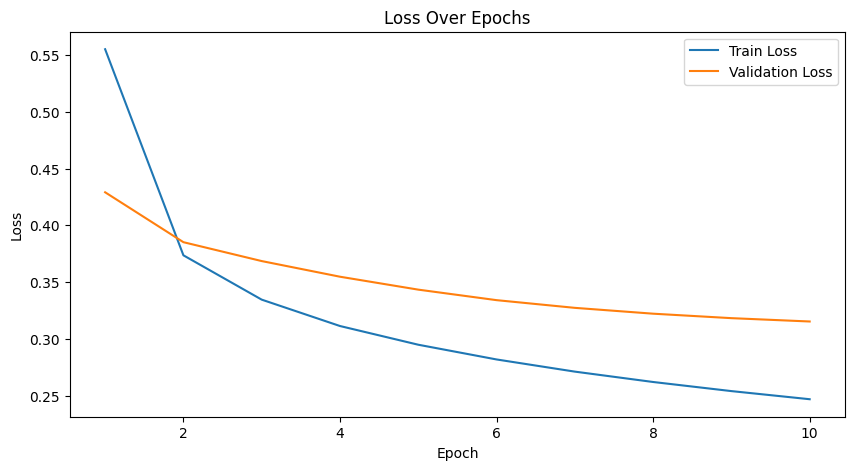

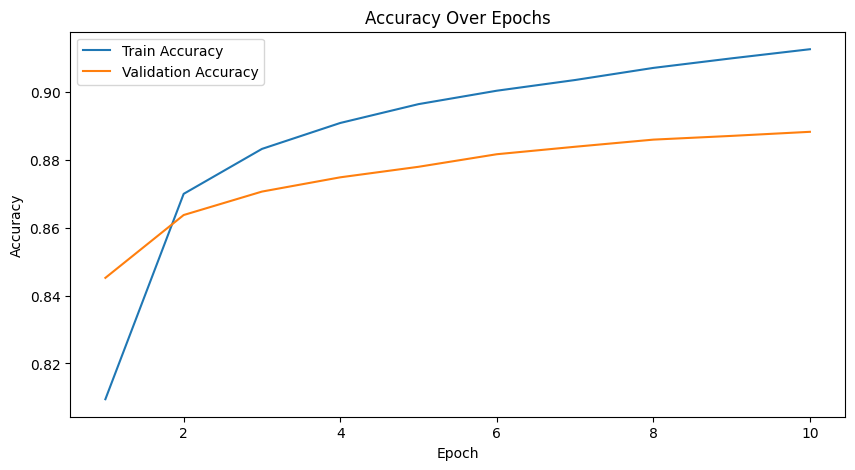

In [7]:
# 이 코드는 훈련 및 검증과정에서의 손실과 정확돌르 시각화하는 부분

# 손실과 정확도 그래프 출력
#훈련 손실은 train_loss_history 리스트에 저장되어있고
#검증 손실은 val_loss_history리스트에 저장되어있다.
#각각의 손실은 훈련 및 검증 과정에서의 평균 손실 값이다. 이 그래프를 통해 모델이 훈련 및 검증 과정에서 손실이 어떻게 변하는지를 확인할 수 있다.

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_loss_history, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_acc_history, label='Train Accuracy')
plt.plot(range(1, epochs + 1), val_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

위의 그래프는 훈련 손실과 test손실 / 훈련 정확성과 test 정확성을 시각화한 것이다. 
위에서 Epoch을 계속 실행했을 때 손실은 점점 줄어들고 정확성은 점점 올라가는 것을 확인할 수 있다.

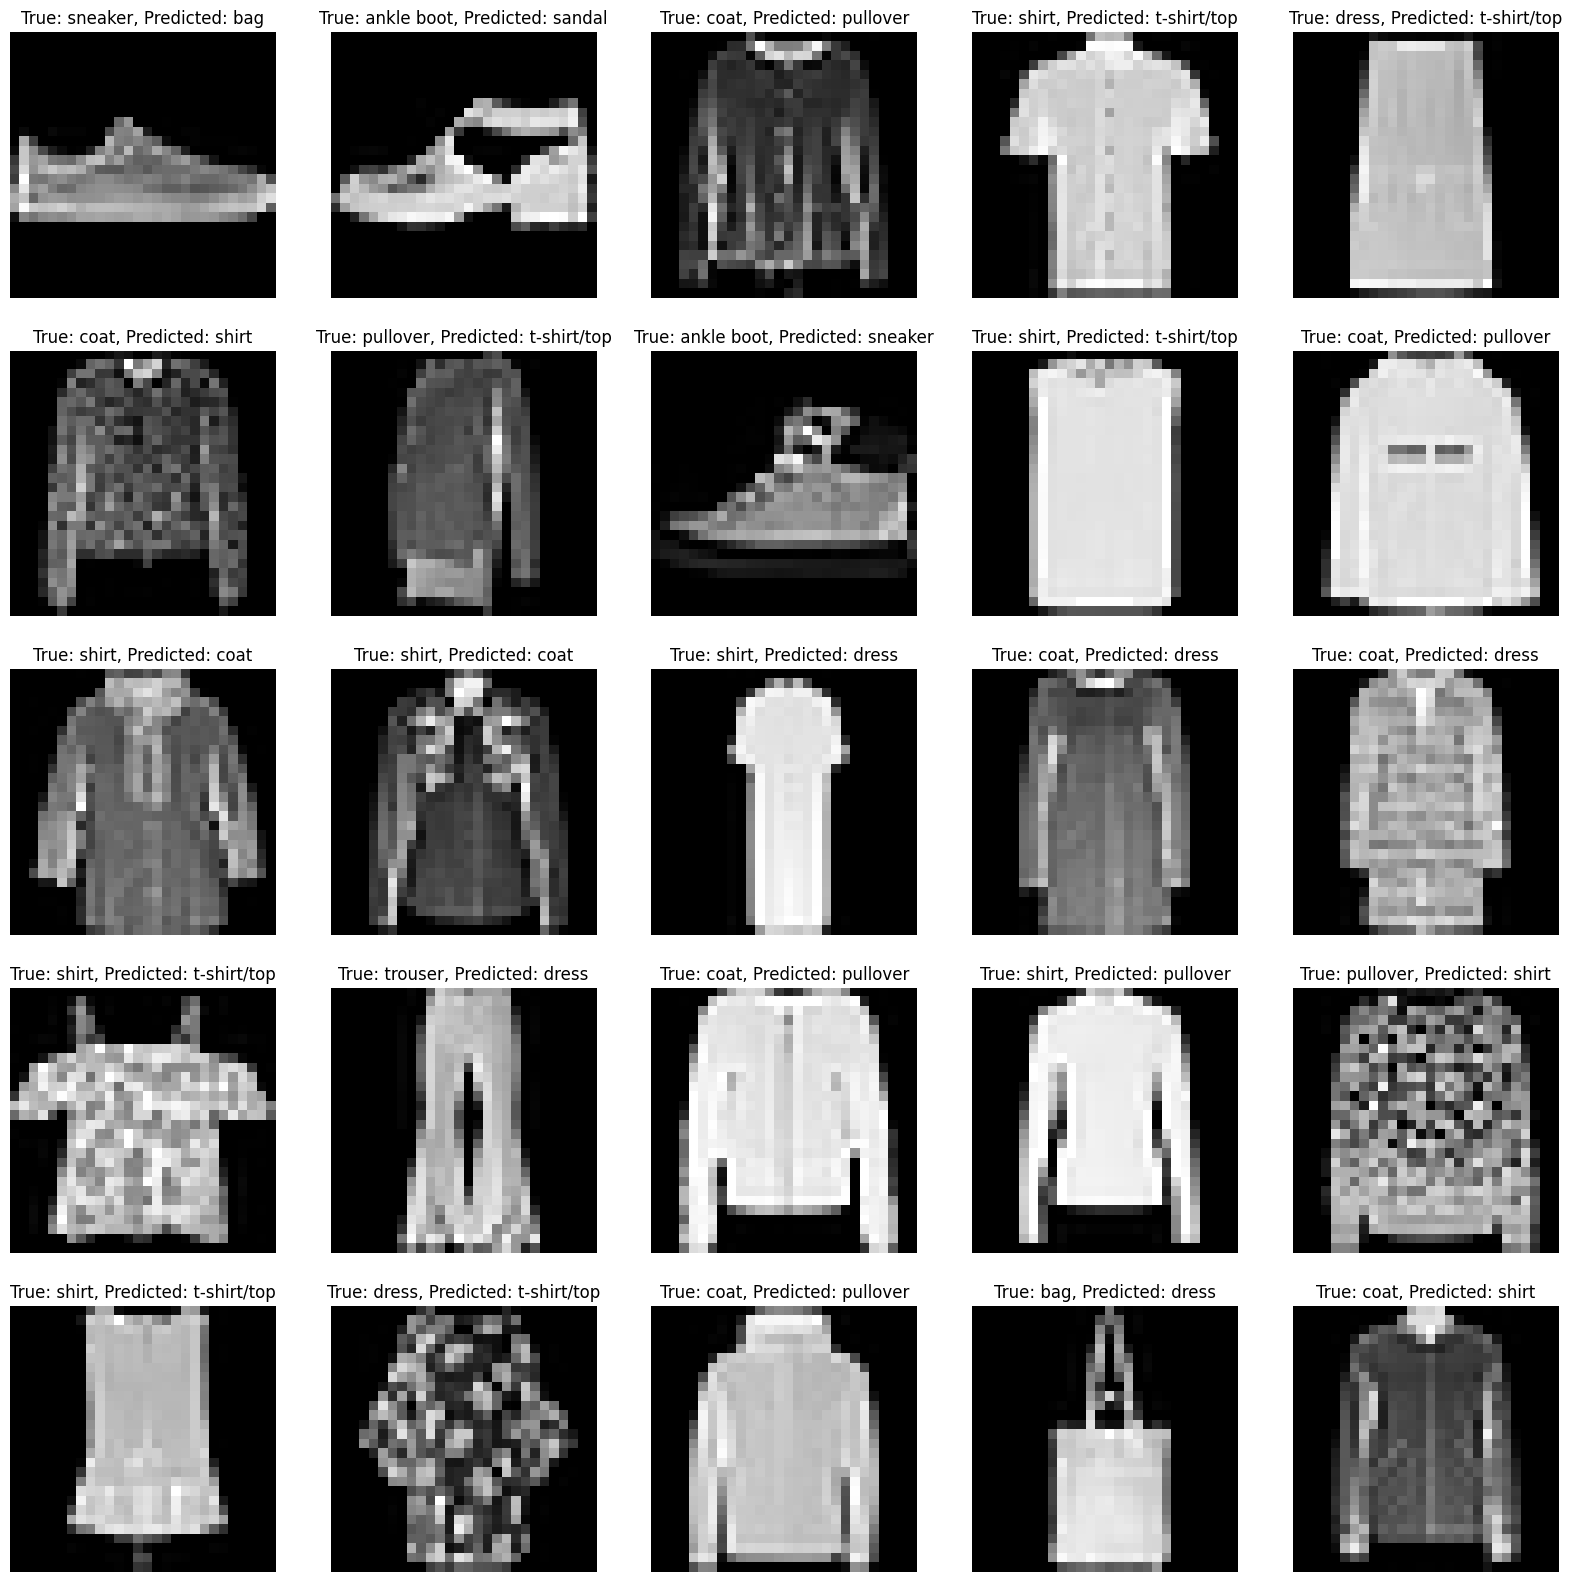

In [8]:
#모델이 잘못 예측한 이미지를 시각화하는 부분
import numpy as np

# 모델을 평가 모드로 설정 - 모델이 평가 중에는 드롭아웃 및 배치 정규화와 같은 일부 동작을 비활성화하기 위함이다.
model.eval()

# 틀린 예측을 저장할 리스트 생성
wrong_predictions = []

# 검증 데이터로 예측 수행
with torch.no_grad():
    #test_loader를 사용하여 검증 데이터에 대해 루프를 실행한다. 각 반복에서는 데이터를 GPU 또는 CPU로 이동한 다음 모델에 입력을 제공하여 예측을 수행한다.
    #torch.max() 함수를 사용하여 각 예측의 최대 확률과 해당 클래스 인덱스를 가져온다.
    for data in test_loader: 
        inputs, labels = data[0].to(default_device), data[1].to(default_device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        wrong_indices = (predicted != labels).nonzero()[:, 0]
        #잘못된 예측의 인덱스를 찾기 위해 predicted와 labels를 비교하여 예측이 잘못된 경우, 해당 인덱스를 wrong_indices에 추가한다.
        for idx in wrong_indices:
            wrong_predictions.append((inputs[idx].cpu(), labels[idx].cpu(), predicted[idx].cpu()))

# 틀린 예측 중에서 16개만 랜덤으로 선택하여 시각화
#해당 인덱스에 대한 이미지, 실제 레이블 및 예측된 레이블을 사용하여 5*5 서브플롯에 이미지를 시각화한다.
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    img, true_label, predicted_label = wrong_predictions[i]
    ax.imshow(img.squeeze().numpy(), cmap='gray')
    ax.set_title(f'True: {labels_map[true_label.item()]}, Predicted: {labels_map[predicted_label.item()]}')
    ax.axis('off')
plt.show()


각 서브플롯은 잘못된 예측에 대한 이미지를 보여준다.

실제로 분류되어야하는 레이블을 True로 나타내고 잘못 예측한 데이터가 무엇인지는 predicted로 나타내준다.